In [1]:
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt   
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('train_hr.csv', index_col=0)
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.9+ MB


In [4]:
df.shape

(54808, 13)

# EDA with Visualisations

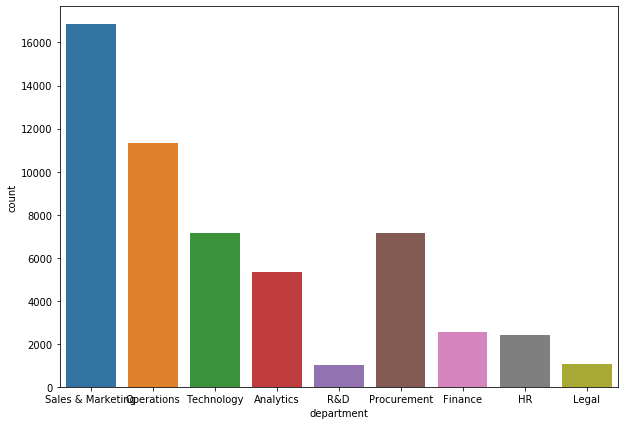

In [5]:
fig,ax = plt.subplots(figsize=(10,7))
sns.countplot(x='department',data=df)
#distribution of department by count

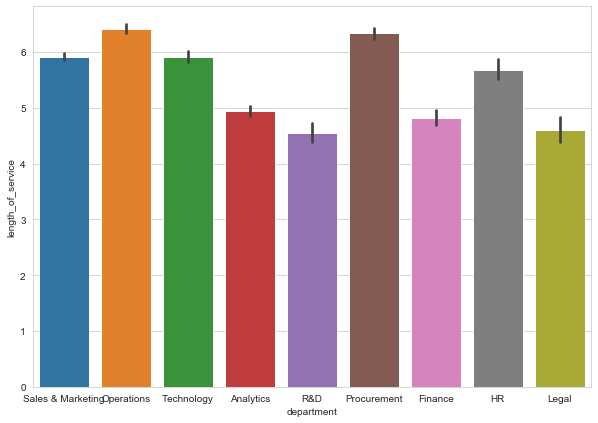

In [6]:
sns.set_style("whitegrid")
fig,ax = plt.subplots(figsize=(10,7))
sns.barplot(x='department',y='length_of_service',data=df)
#plot below shows the length of service according to the department

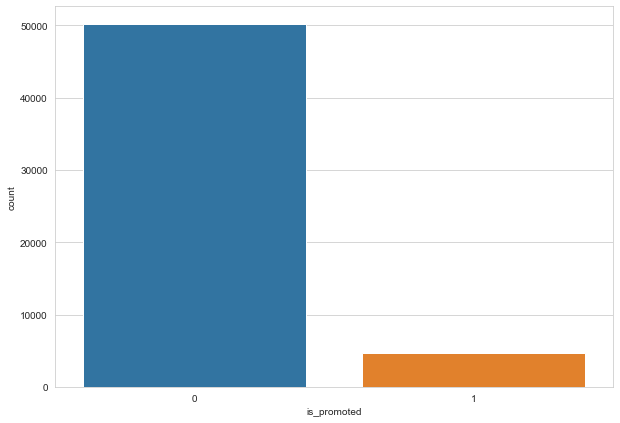

In [7]:
sns.set_style("whitegrid")
fig,ax = plt.subplots(figsize=(10,7))
sns.countplot(x='is_promoted',data=df)
#below plot shows the countplot of the target variable "is_promoted" and shows the imbalance of the class distribution

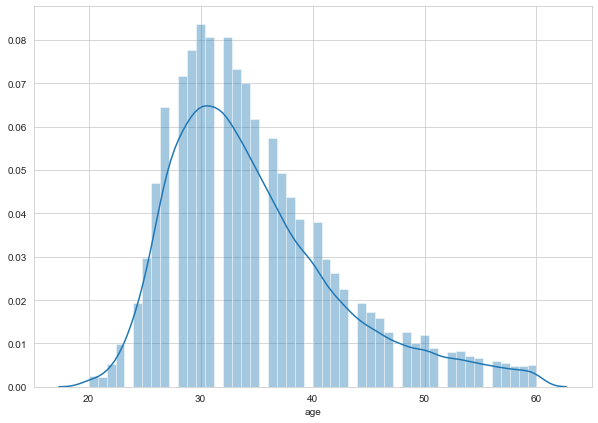

In [8]:
#distribution plot
fig,ax = plt.subplots(figsize=(10,7))
sns.distplot(df.age)

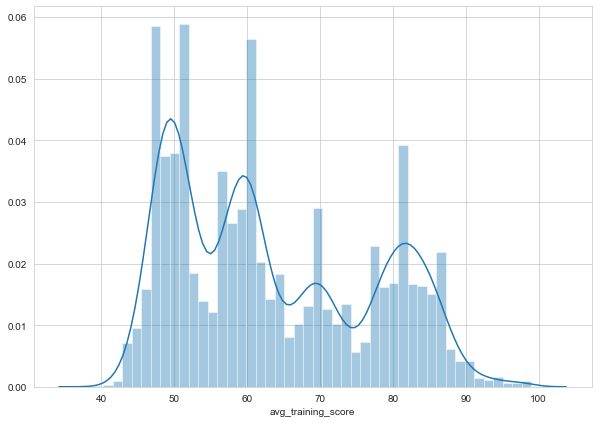

In [9]:
#distribution plot 
fig,ax = plt.subplots(figsize=(10,7))
sns.distplot(df.avg_training_score)

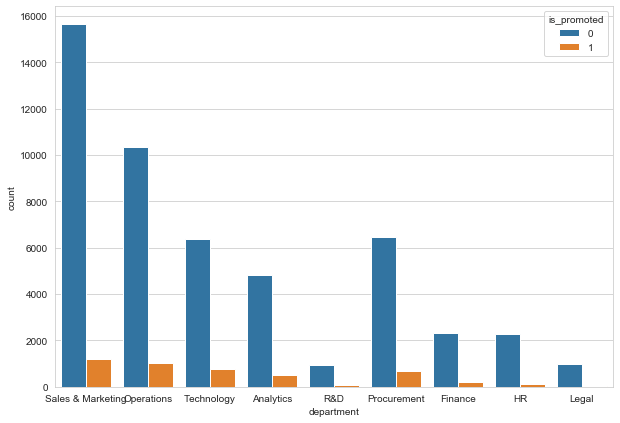

In [10]:
fig,ax = plt.subplots(figsize=(10,7))
sns.countplot(x='department',hue='is_promoted',data=df)
#this plot shows the count of people in each department and 

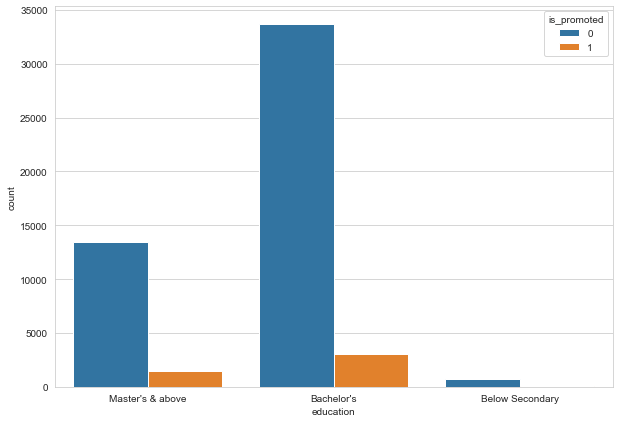

In [11]:
fig,ax = plt.subplots(figsize=(10,7))
sns.countplot(x='education',hue='is_promoted',data=df)
#impact of education on getting promoted

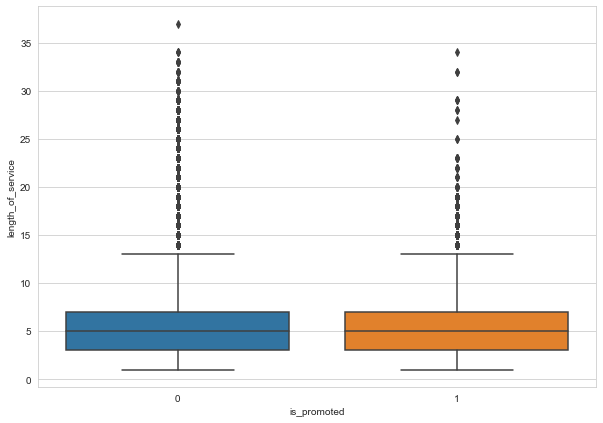

In [16]:
fig,ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='is_promoted',y='length_of_service',data=df)

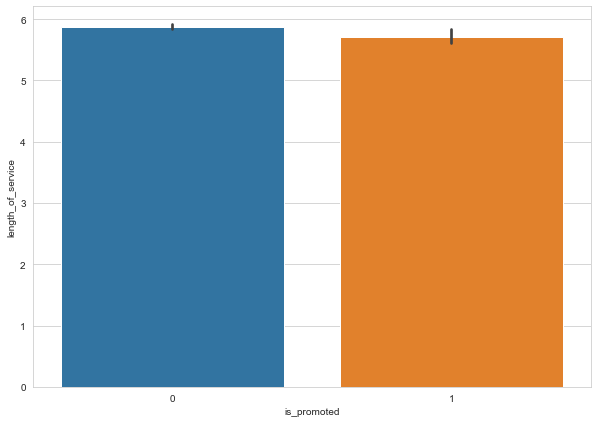

In [17]:
fig,ax = plt.subplots(figsize=(10,7))
sns.barplot(x='is_promoted',y='length_of_service',data=df)

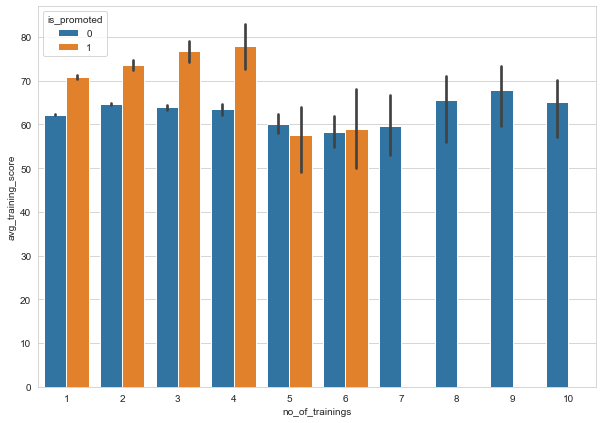

In [28]:
fig,ax = plt.subplots(figsize=(10,7))
sns.barplot(x='no_of_trainings',y='avg_training_score',hue='is_promoted',data=df)
#from the plot shown below, we can see that avg_training_score with more than 70 are more likely to get promoted

# Missing values imputation

In [5]:
df.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [6]:
df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [7]:
df['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

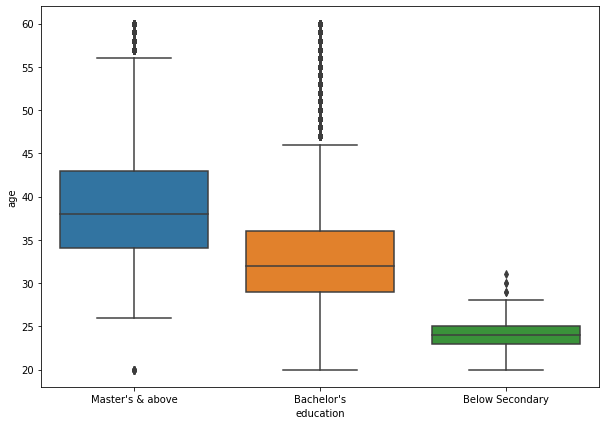

In [8]:
plt.figure(figsize=(10,7))
sns.boxplot(x='education',y='age',data=df)

In [9]:
#from the above visualisation we see that for different age groups, the education also differs
#creating a function for imputing the missing values in "education" variable
def impute_education(cols):
    education = cols[0]
    age = cols[1]

    if pd.isnull(education):

        #ranges are set as per the interquartile values of each category
        if age < 28:
            return "Below Secondary"

        elif age in range(29,37):
            return "Bachelor's"

        else:
            return "Master's & above"

    else:
        return education

In [10]:
#applying the function on the 'education' variable
df['education'] = df[['education','age']].apply(impute_education, axis=1) 

In [11]:
df['education'].value_counts()

Bachelor's          37528
Master's & above    15568
Below Secondary      1712
Name: education, dtype: int64

In [12]:
df.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [14]:
#missing values in the variable "previous_year_rating" is mostly for the observations where "length_of_service"==1 
df['previous_year_rating'].fillna(0, inplace=True)
df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [15]:
#dropping the 'gender' variable as it does not help in making predictions
df.drop('gender',axis=1,inplace=True) 
df.shape

(54808, 12)

# Label Encoding

In [16]:
colname = ['department','region','education','recruitment_channel']

In [17]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for x in colname:
    df[x] = le.fit_transform(df[x])

In [18]:
df.head()

,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,
65438,7,31,2,2,1,35,5.0,8,1,0,49,0
65141,4,14,0,0,1,30,5.0,4,0,0,60,0
7513,7,10,0,2,1,34,3.0,7,0,0,50,0
2542,7,15,0,0,2,39,1.0,10,0,0,50,0
48945,8,18,0,0,1,45,3.0,2,0,0,73,0


In [19]:
X = df.values[:,:-1]
y = df.values[:,-1]

# Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)

[[ 0.80893285  1.77652645  1.55800856 ...  1.35687789 -0.15401776
  -1.07593145]
 [-0.38818322 -0.16303375 -0.66665102 ... -0.73698599 -0.15401776
  -0.25328242]
 [ 0.80893285 -0.61940086 -0.66665102 ... -0.73698599 -0.15401776
  -1.00114517]
 ...
 [-1.98433798 -1.76031862 -0.66665102 ...  1.35687789 -0.15401776
   1.1676568 ]
 [ 0.80893285  2.00471    -0.66665102 ... -0.73698599 -0.15401776
  -1.37507655]
 [-1.1862606  -0.16303375 -0.66665102 ... -0.73698599 -0.15401776
  -1.07593145]]


# Splitting into train and test and building models

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [22]:
import warnings
warnings.filterwarnings("ignore")

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train) 

LogisticRegression()

In [24]:
log_pred = logistic.predict(X_test) 

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, log_pred)) 
print(classification_report(y_test, log_pred)) 

[[14995    69]
 [ 1285    94]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     15064
         1.0       0.58      0.07      0.12      1379

    accuracy                           0.92     16443
   macro avg       0.75      0.53      0.54     16443
weighted avg       0.89      0.92      0.89     16443



# SVM

In [26]:
from sklearn import svm 

svc_model = svm.SVC(kernel='rbf', C=1.0, gamma=0.1)
svc_model.fit(X_train,y_train)

SVC(gamma=0.1)

In [27]:
svm_pred = svc_model.predict(X_test) 

In [28]:
print(confusion_matrix(y_test, svm_pred)) 
print(classification_report(y_test, svm_pred))

[[15043    21]
 [ 1243   136]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     15064
         1.0       0.87      0.10      0.18      1379

    accuracy                           0.92     16443
   macro avg       0.89      0.55      0.57     16443
weighted avg       0.92      0.92      0.89     16443



# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() 
rf.fit(X_train, y_train) 

RandomForestClassifier()

In [30]:
rf_pred = rf.predict(X_test)

In [31]:
print(confusion_matrix(y_test, rf_pred)) 
print(classification_report(y_test, rf_pred)) 

[[14954   110]
 [  988   391]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     15064
         1.0       0.78      0.28      0.42      1379

    accuracy                           0.93     16443
   macro avg       0.86      0.64      0.69     16443
weighted avg       0.92      0.93      0.92     16443



# Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier() 
dtree.fit(X_train, y_train) 

DecisionTreeClassifier()

In [33]:
dtree_pred = dtree.predict(X_test)

In [34]:
print(confusion_matrix(y_test, dtree_pred)) 
print(classification_report(y_test, dtree_pred)) 

[[14098   966]
 [  759   620]]
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94     15064
         1.0       0.39      0.45      0.42      1379

    accuracy                           0.90     16443
   macro avg       0.67      0.69      0.68     16443
weighted avg       0.90      0.90      0.90     16443



# Upsampling

In [35]:
from sklearn.utils import resample
#seperate majority and minority classes
df_majority = df[df.is_promoted==0]
df_minority = df[df.is_promoted==1]

#upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=50140,
                                 random_state=10)

#combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

#display new class counts
df_upsampled['is_promoted'].value_counts()

1    50140
0    50140
Name: is_promoted, dtype: int64

In [36]:
X = df_upsampled.values[:,:-1]
y = df_upsampled.values[:,-1]

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)

[[ 0.80095407  1.76473212  1.50113993 ...  0.98195379 -0.2672541
  -1.23779348]
 [-0.38713063 -0.1773577  -0.68939    ... -1.01837786 -0.2672541
  -0.48025744]
 [ 0.80095407 -0.63432001 -0.68939    ... -1.01837786 -0.2672541
  -1.16892656]
 ...
 [ 1.19698231 -0.06311712  1.50113993 ...  0.98195379 -0.2672541
   0.75934699]
 [ 0.40492584  0.39384519 -0.68939    ...  0.98195379 -0.2672541
   1.31028229]
 [-1.97124358 -0.1773577  -0.68939    ... -1.01837786 -0.2672541
   1.3791492 ]]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Logistic Regression after Upsampling

In [39]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train) 

LogisticRegression()

In [40]:
log_pred = logistic.predict(X_test) 

In [41]:
print(confusion_matrix(y_test, log_pred)) 
print(classification_report(y_test, log_pred)) 

[[10685  4330]
 [ 3983 11086]]
              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72     15015
         1.0       0.72      0.74      0.73     15069

    accuracy                           0.72     30084
   macro avg       0.72      0.72      0.72     30084
weighted avg       0.72      0.72      0.72     30084



# Decision Tree after Upsampling

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier() 
dtree.fit(X_train, y_train) 

DecisionTreeClassifier()

In [43]:
dtree_pred = dtree.predict(X_test)

In [44]:
print(confusion_matrix(y_test, dtree_pred)) 
print(classification_report(y_test, dtree_pred)) 

[[13967  1048]
 [    0 15069]]
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     15015
         1.0       0.93      1.00      0.97     15069

    accuracy                           0.97     30084
   macro avg       0.97      0.97      0.97     30084
weighted avg       0.97      0.97      0.97     30084



# Random Forest after Upsampling

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() 
rf.fit(X_train, y_train) 

RandomForestClassifier()

In [46]:
rf_pred = rf.predict(X_test)

In [47]:
print(confusion_matrix(y_test, rf_pred)) 
print(classification_report(y_test, rf_pred))

[[14419   596]
 [    0 15069]]
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     15015
         1.0       0.96      1.00      0.98     15069

    accuracy                           0.98     30084
   macro avg       0.98      0.98      0.98     30084
weighted avg       0.98      0.98      0.98     30084



# SVM after Upsampling

In [48]:
from sklearn import svm 

svc_model = svm.SVC(kernel='rbf', C=1.0, gamma=0.1)
svc_model.fit(X_train,y_train)

SVC(gamma=0.1)

In [49]:
svm_pred = svc_model.predict(X_test) 

In [50]:
print(confusion_matrix(y_test, svm_pred)) 
print(classification_report(y_test, svm_pred))

[[10239  4776]
 [ 1557 13512]]
              precision    recall  f1-score   support

         0.0       0.87      0.68      0.76     15015
         1.0       0.74      0.90      0.81     15069

    accuracy                           0.79     30084
   macro avg       0.80      0.79      0.79     30084
weighted avg       0.80      0.79      0.79     30084



Random Forest Classifier performed the best on the training data out of all the other classfication algorithms as the recall value and f1 score is better compared to the other classifiers. Therefore Random Forest Classifier model will be used to make predictions on the test data

# Making Predictions on Test data using the best model

In [51]:
df_test = pd.read_csv('test_hr.csv',index_col=0)
df_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [52]:
test = pd.DataFrame.copy(df_test) 
test.head() 

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [53]:
test.drop('gender',axis=1,inplace=True) 
test.shape

(23490, 11)

In [60]:
test.isnull().sum()

department                 0
region                     0
education               1034
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [61]:
#using the function that was created to impute the missing values of variable "education"
test['education'] = test[['education','age']].apply(impute_education, axis=1) 

In [67]:
test['previous_year_rating'].fillna(0, inplace=True)
test.isnull().sum()

department              0
region                  0
education               0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [68]:
colname = ['department','region','education','recruitment_channel']

In [69]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for x in colname:
    test[x] = le.fit_transform(test[x])

In [70]:
test.head()

,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,
8724,8,18,0,2,1,24,0.0,1,1,0,77
74430,2,28,0,0,1,31,3.0,5,0,0,51
72255,7,4,0,0,1,31,1.0,4,0,0,47
38562,5,11,0,0,3,31,2.0,9,0,0,65
64486,1,21,0,2,1,30,4.0,7,0,0,61


In [71]:
test.isnull().sum()

department              0
region                  0
education               0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(test)

test = scaler.transform(test)
print(test)

[[ 1.20605773  0.29048988 -0.67439886 ...  1.33671517 -0.15266456
   1.02426301]
 [-1.18015377  1.43662118 -0.67439886 ... -0.74810253 -0.15266456
  -0.91437691]
 [ 0.80835581 -1.31409394 -0.67439886 ... -0.74810253 -0.15266456
  -1.21262921]
 ...
 [-1.18015377 -0.97025455 -0.67439886 ... -0.74810253 -0.15266456
  -0.98893999]
 [ 0.01295198  0.97816866 -0.67439886 ... -0.74810253 -0.15266456
   0.5023215 ]
 [ 1.20605773 -0.85564142  1.54121363 ...  1.33671517 -0.15266456
   1.9190199 ]]


In [83]:
is_promoted = rf.predict(test)

In [84]:
outcome = pd.DataFrame(is_promoted,columns=['is_promoted'])

In [103]:
df_test.reset_index(drop=True, inplace=True) 
outcome.reset_index(drop=True, inplace=True) 

In [104]:
test_results = pd.concat([df_test, outcome['is_promoted']],axis=1)

In [105]:
test_results.head(50)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,0.0
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0.0
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0.0
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0.0
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0.0
5,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68,0.0
6,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,1,0,57,0.0
7,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,0,85,0.0
8,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,0,75,0.0
9,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,1,0,76,0.0


In [106]:
test_results.to_csv('test_results.csv')